<a href="https://colab.research.google.com/github/SyedHuzaifa007/PIAIC-Deep-Learning-Assignments/blob/main/Car_Price_Prediction_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [57]:
# Importing Modules 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Loading the data

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/PIAIC Deep Learning Assignments/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [8]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
# Droping Unecessary Features

df.drop(["car_ID", "symboling", "CarName"], axis=1, inplace=True)
# Extracting Numerical Features

df.drop(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'], axis = 1, inplace=True)

In [10]:
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00
horsepower,205.0,104.117073,39.544167,48.00,70.00,95.00,116.00,288.00


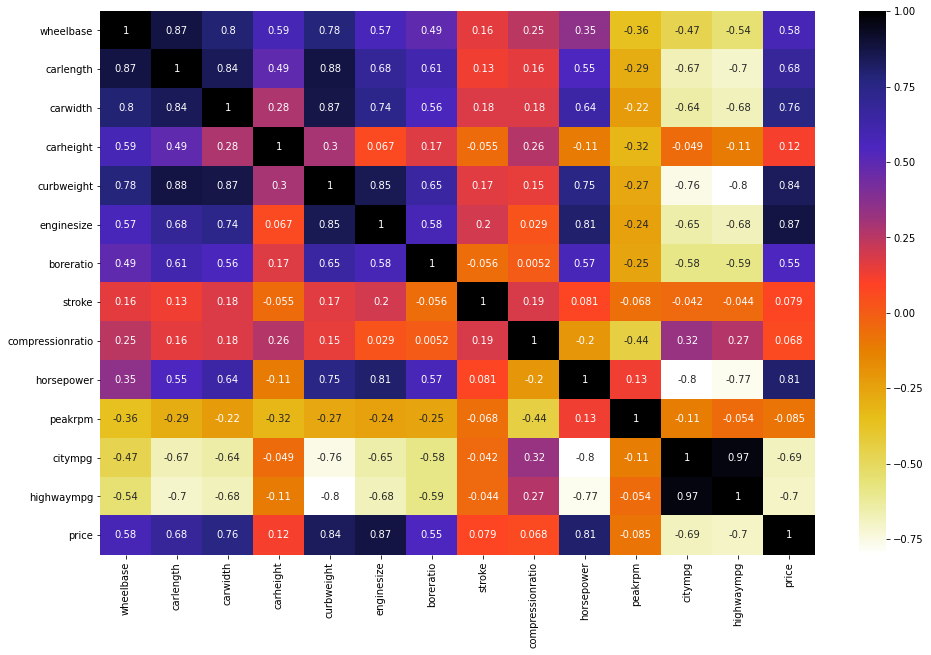

In [12]:
# Making A HeatMap of correlations
correlations = df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(correlations, cmap="CMRmap_r", annot=True)
plt.show()

In [13]:
df.shape

(205, 14)

In [14]:
df

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [15]:
# Splitting The Dataset Into Training and Testing Data
train_data = df.iloc[:145,:]
train_data

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,93.3,157.3,63.8,55.7,2240,108,3.62,2.64,8.7,73,4400,26,31,7603.0
141,97.2,172.0,65.4,52.5,2145,108,3.62,2.64,9.5,82,4800,32,37,7126.0
142,97.2,172.0,65.4,52.5,2190,108,3.62,2.64,9.5,82,4400,28,33,7775.0
143,97.2,172.0,65.4,52.5,2340,108,3.62,2.64,9.0,94,5200,26,32,9960.0


In [16]:
test_data = df.iloc[145:,:]
test_data

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
145,97.0,172.0,65.4,54.3,2510,108,3.62,2.64,7.7,111,4800,24,29,11259.0
146,97.0,173.5,65.4,53.0,2290,108,3.62,2.64,9.0,82,4800,28,32,7463.0
147,97.0,173.5,65.4,53.0,2455,108,3.62,2.64,9.0,94,5200,25,31,10198.0
148,96.9,173.6,65.4,54.9,2420,108,3.62,2.64,9.0,82,4800,23,29,8013.0
149,96.9,173.6,65.4,54.9,2650,108,3.62,2.64,7.7,111,4800,23,23,11694.0
150,95.7,158.7,63.6,54.5,1985,92,3.05,3.03,9.0,62,4800,35,39,5348.0
151,95.7,158.7,63.6,54.5,2040,92,3.05,3.03,9.0,62,4800,31,38,6338.0
152,95.7,158.7,63.6,54.5,2015,92,3.05,3.03,9.0,62,4800,31,38,6488.0
153,95.7,169.7,63.6,59.1,2280,92,3.05,3.03,9.0,62,4800,31,37,6918.0
154,95.7,169.7,63.6,59.1,2290,92,3.05,3.03,9.0,62,4800,27,32,7898.0


In [17]:
test_data.shape

(60, 14)

In [18]:
# Seperating Labels From Train And Test Data
copy_of_train_data = train_data.copy()
copy_of_test_data = test_data.copy()
train_labels = train_data.pop('price')
test_labels = test_data.pop('price')

In [19]:
train_labels

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
140     7603.0
141     7126.0
142     7775.0
143     9960.0
144     9233.0
Name: price, Length: 145, dtype: float64

In [20]:
test_labels

145    11259.0
146     7463.0
147    10198.0
148     8013.0
149    11694.0
150     5348.0
151     6338.0
152     6488.0
153     6918.0
154     7898.0
155     8778.0
156     6938.0
157     7198.0
158     7898.0
159     7788.0
160     7738.0
161     8358.0
162     9258.0
163     8058.0
164     8238.0
165     9298.0
166     9538.0
167     8449.0
168     9639.0
169     9989.0
170    11199.0
171    11549.0
172    17669.0
173     8948.0
174    10698.0
175     9988.0
176    10898.0
177    11248.0
178    16558.0
179    15998.0
180    15690.0
181    15750.0
182     7775.0
183     7975.0
184     7995.0
185     8195.0
186     8495.0
187     9495.0
188     9995.0
189    11595.0
190     9980.0
191    13295.0
192    13845.0
193    12290.0
194    12940.0
195    13415.0
196    15985.0
197    16515.0
198    18420.0
199    18950.0
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, dtype: float64

In [21]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
wheelbase,145.0,98.471724,6.577325,86.60,93.70,96.50,101.20,120.90
carlength,145.0,173.550345,13.498313,141.10,165.30,173.00,181.70,208.10
carwidth,145.0,65.973793,2.357200,60.30,64.00,65.40,66.60,72.30
carheight,145.0,53.404138,2.576358,47.80,50.80,53.70,55.50,59.80
curbweight,145.0,2564.937931,573.746620,1488.00,2028.00,2410.00,2926.00,4066.00
enginesize,145.0,129.806897,46.846276,61.00,97.00,120.00,152.00,326.00
boreratio,145.0,3.322000,0.277172,2.54,3.13,3.35,3.54,3.94
stroke,145.0,3.272966,0.334744,2.07,3.15,3.29,3.46,4.17
compressionratio,145.0,9.861517,3.573653,7.00,8.50,9.00,9.40,22.70
horsepower,145.0,106.993103,42.301086,48.00,72.00,95.00,123.00,288.00


In [22]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
wheelbase,60.0,99.445000,4.371690,94.50,95.70,97.30,102.525,109.10
carlength,60.0,175.255000,8.915620,158.70,168.70,173.60,183.200,188.80
carwidth,60.0,65.748333,1.521094,63.60,64.40,65.50,66.900,68.90
carheight,60.0,54.500000,1.892268,51.40,52.80,54.70,55.700,59.10
curbweight,60.0,2532.916667,364.989542,1985.00,2263.25,2437.50,2939.250,3217.00
enginesize,60.0,119.900000,23.855284,92.00,98.00,109.00,141.000,173.00
boreratio,60.0,3.348500,0.256183,3.01,3.19,3.27,3.620,3.78
stroke,60.0,3.213000,0.252904,2.64,3.03,3.25,3.400,3.54
compressionratio,60.0,10.821667,4.766376,7.50,9.00,9.00,9.425,23.00
horsepower,60.0,97.166667,31.146002,52.00,70.00,92.00,114.000,162.00


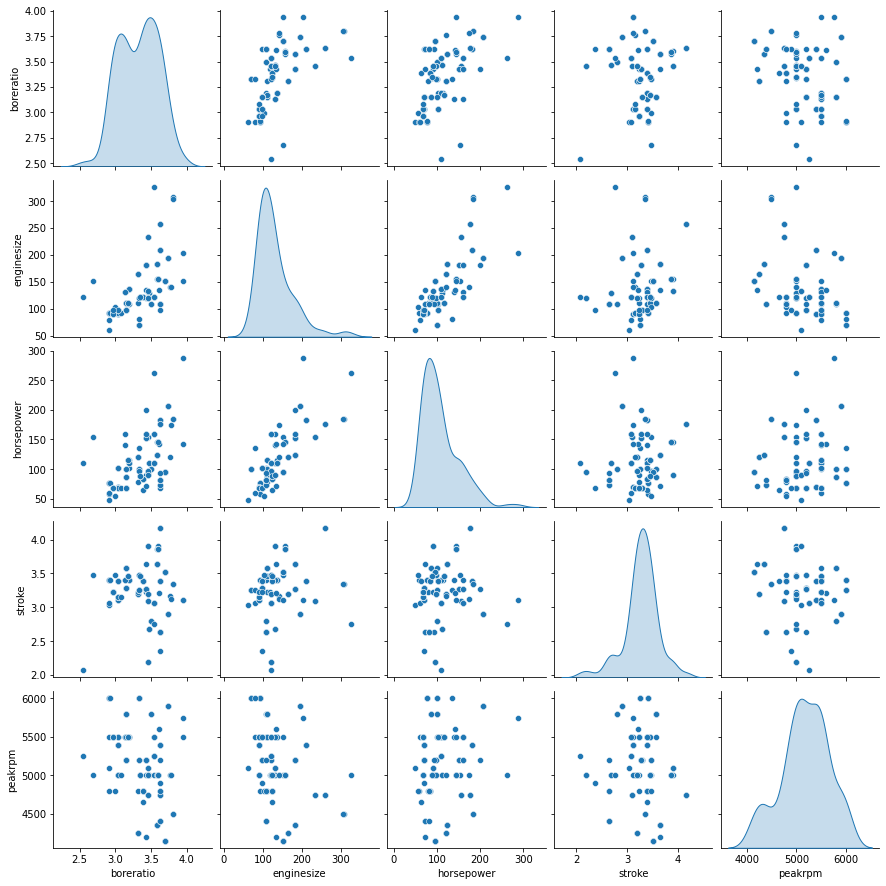

In [23]:
sns.pairplot(train_data[["boreratio", "enginesize", "horsepower", 'stroke', 'peakrpm']], diag_kind="kde")

In [24]:
# Noramalizing The Data 
train_mean = np.mean(train_data, axis=0)
train_std = np.std(train_data, axis=0)

normal_train_data = (train_data-train_mean) / train_std
normal_test_data = (test_data-train_mean) / train_std

In [25]:
normal_train_data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,-1.506074,-0.353141,-0.797679,-1.793266,-0.029624,0.004136,0.535815,-1.777539,-0.241910,0.095052,-0.376467,-0.542492,-0.471376
1,-1.506074,-0.353141,-0.797679,-1.793266,-0.029624,0.004136,0.535815,-1.777539,-0.241910,0.095052,-0.376467,-0.542492,-0.471376
2,-0.605944,-0.174725,-0.201695,-0.391102,0.451343,0.475385,-2.324278,0.590652,-0.241910,1.115097,-0.376467,-0.830629,-0.611150
3,0.202648,0.226712,0.096297,0.348929,-0.398657,-0.445692,-0.477889,0.380813,0.038885,-0.118446,0.685551,-0.110287,-0.052054
4,0.141622,0.226712,0.181437,0.348929,0.453092,0.132659,-0.477889,0.380813,-0.522706,0.189940,0.685551,-0.974698,-1.170247


In [26]:
normal_test_data.tail()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
200,1.621497,1.133661,1.245694,0.816318,0.676960,0.239761,1.658130,-0.368615,-0.101512,0.166218,0.473147,-0.254355,-0.331602
201,1.621497,1.133661,1.203124,0.816318,0.846611,0.239761,1.658130,-0.368615,-0.326149,1.257429,0.260744,-0.830629,-0.750924
202,1.621497,1.133661,1.245694,0.816318,0.781899,0.925214,0.934056,-1.207974,-0.298069,0.640658,0.685551,-0.974698,-1.030473
203,1.621497,1.133661,1.245694,0.816318,1.140438,0.325442,-1.129556,0.380813,3.689229,-0.023558,-0.801274,0.177850,-0.471376
204,1.621497,1.133661,1.245694,0.816318,0.869347,0.239761,1.658130,-0.368615,-0.101512,0.166218,0.473147,-0.830629,-0.750924


In [45]:
# Making Model

model = tf.keras.models.Sequential()
model.add(Dense(15, activation = 'relu', input_shape=[len(train_data.keys())]))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(6, activation = 'sigmoid'))
model.add(Dense(5))
model.compile(loss = 'mse', optimizer = 'rmsprop', metrics = ['mse','mae','accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 15)                210       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 35        
Total params: 547
Trainable params: 547
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Training Model on Train Data
history = model.fit(normal_train_data, train_labels, epochs=40, batch_size=128, verbose=0, validation_split=0.2)

In [47]:
# Feeding History In DataFrame
history_df = pd.DataFrame(history.history)
history_df['epochs'] = history.epoch
history_df.tail()

,loss,mse,mae,accuracy,val_loss,val_mse,val_mae,val_accuracy,epochs
35,276011616.0,276011616.0,13998.415039,0.0,283878016.0,283878016.0,14249.219727,0.0,35
36,276011360.0,276011360.0,13998.406250,0.0,283877792.0,283877792.0,14249.208984,0.0,36
37,276011104.0,276011104.0,13998.397461,0.0,283877504.0,283877504.0,14249.198242,0.0,37
38,276010784.0,276010784.0,13998.387695,0.0,283877280.0,283877280.0,14249.189453,0.0,38
39,276010528.0,276010528.0,13998.376953,0.0,283876960.0,283876960.0,14249.180664,0.0,39


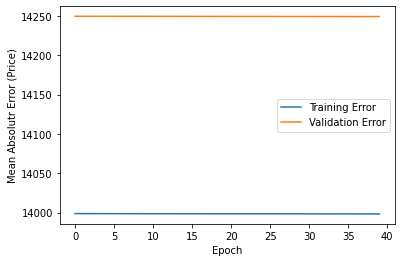

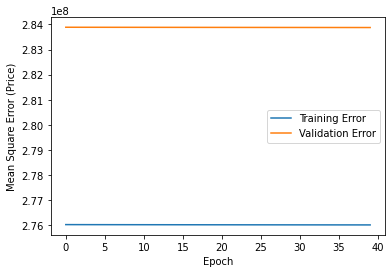

In [71]:
# plot loss on validation data
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolutr Error (Price)')
  plt.plot(history_df['epochs'], history_df['mae'], label = 'Training Error')
  plt.plot(history_df['epochs'], history_df['val_mae'], label = 'Validation Error')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error (Price)')
  plt.plot(history_df['epochs'], history_df['mse'], label = 'Training Error')
  plt.plot(history_df['epochs'], history_df['val_mse'], label = 'Validation Error')
  plt.legend()

plot_history(history)

In [49]:
# Making Predictions On Test Data
example_batch = normal_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.31029797,  1.3889337 ,  0.7931978 ,  0.7983746 ,  0.26974458],
       [-0.31029797,  1.3889337 ,  0.7931978 ,  0.7983746 ,  0.26974458],
       [-0.3116191 ,  1.3481376 ,  0.8234018 ,  0.7471257 ,  0.22086488],
       [-0.3095966 ,  1.3070092 ,  0.76602143,  0.66358703,  0.23469514],
       [-0.3132825 ,  1.4060185 ,  0.84461635,  0.80107635,  0.2668159 ],
       [-0.300125  ,  1.3389077 ,  0.8012921 ,  0.7032408 ,  0.24059007],
       [-0.32181293,  1.4489591 ,  0.84834135,  0.8941733 ,  0.29523066],
       [-0.3283763 ,  1.4467089 ,  0.8335895 ,  0.8905313 ,  0.29871428],
       [-0.37049955,  1.475314  ,  0.8214849 ,  0.99088234,  0.3099575 ],
       [-0.30150247,  1.3427626 ,  0.82404625,  0.7512237 ,  0.22297461]],
      dtype=float32)

In [51]:
test_score = model.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 6ms/step - loss: 148368384.0000 - mse: 148368384.0000 - mae: 11409.3145 - accuracy: 0.0000e+00


In [53]:
print(f"Mean Squared Error: {test_score[1]}")
print(f"Mean Absolute Error: {test_score[2]}")

Mean Squared Error: 148368384.0
Mean Absolute Error: 11409.314453125


In [61]:
# Overcoming Overfitting
from tensorflow.keras.callbacks import EarlyStopping
overcome = EarlyStopping(monitor = 'val_loss', patience = 10)

history_1 = model.fit(normal_train_data, train_labels, epochs = 1000, verbose = 0, validation_split = 0.2)

In [66]:
history_df_1 = pd.DataFrame(history_1.history)
history_df_1['epochs'] = history_1.epoch
history_df_1.tail()

,loss,mse,mae,accuracy,val_loss,val_mse,val_mae,val_accuracy,epochs
995,275228544.0,275228544.0,13970.408203,0.0,283080608.0,283080608.0,14221.207031,0.0,995
996,275227744.0,275227744.0,13970.378906,0.0,283079872.0,283079872.0,14221.178711,0.0,996
997,275226944.0,275226944.0,13970.353516,0.0,283079040.0,283079040.0,14221.150391,0.0,997
998,275226208.0,275226208.0,13970.324219,0.0,283078240.0,283078240.0,14221.123047,0.0,998
999,275225408.0,275225408.0,13970.297852,0.0,283077472.0,283077472.0,14221.094727,0.0,999


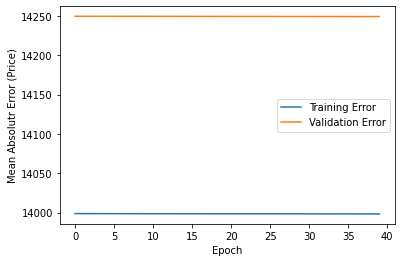

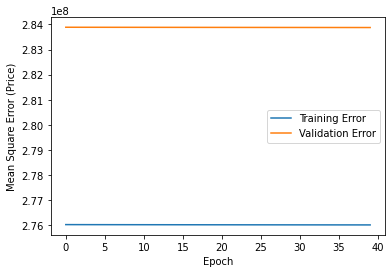

In [72]:
plot_history(history_1)